In [24]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

In [69]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37]==x[27:41]:
            return x

In [81]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'
data = []
dataCM = []

CM = random.choice(os.listdir(pathCM))
file07 = None
file14 = None
while file07 == None or file14 == None:
    file07 = find_npy_file(path, CM, '07')
    file14 = find_npy_file(path, CM, '14')
    
img07 = np.load(path + file07)
img14 = np.load(path + file14)
diff = img07 - img14
diffcm = diff.copy()
        
mask = np.load(pathCM + CM)
mask = mask.astype(bool)
diffcm[mask] = 0

In [71]:
diff

array([[ 2.4541626,  1.9512024,  1.9512024, ...,  5.9468384,  5.9468384,
         5.0473633],
       [ 2.7282104,  2.9143982,  2.6147766, ...,  5.6793365,  4.6786804,
         4.6786804],
       [ 2.7282104,  2.9143982,  2.6147766, ...,  5.6793365,  4.6786804,
         8.190567 ],
       ...,
       [ 4.4237976,  4.2287903,  4.2287903, ..., 15.98114  , 16.011383 ,
        16.608765 ],
       [ 3.4831238,  3.7825928,  4.2239685, ..., 16.734314 , 16.734314 ,
        15.790924 ],
       [ 2.7963867,  2.8206787,  3.4309082, ..., 16.734314 , 15.790924 ,
        15.408707 ]], dtype=float32)

In [77]:
diffcm.max()

13.872253

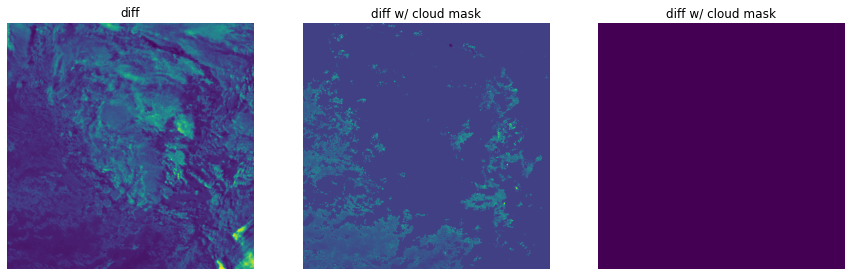

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

x = ax[0].imshow(diff, aspect='equal')
ax[0].set_title('diff')
ax[0].axis('off')

x = ax[1].imshow(diffcm, aspect='equal')
ax[1].set_title('diff w/ cloud mask')
ax[1].axis('off')

x = ax[2].imshow(diffcm>10, aspect='equal')
ax[2].set_title('diff w/ cloud mask')
ax[2].axis('off')

plt.axis('off')
plt.show()

In [42]:
diff.max()

12.64386